# Les réseaux - les protocoles de routage

## Rappel de cours
### adresses IP et masque de sous-réseau

Les adresses IP sont de la forme : `"a.b.c.d"`, avec a, b, c et d compris entre 0 et 255 (a, b, c et d sont codés sur 1 octet).  
Une adresse IP est en fait l'adresse du **réseau** ET de la **machine**, elle est codée sur 32 bits soit 4 octets.  
Pour "simplifier" sa lecture par les humains, elle est écrite en décimal.   
Les 4 octets sont séparés sous forme de 4 chiffres décimaux allant de 0 à 255. ex : `196.168.0.1`  
Une partie de l’adresse IP permet donc d’identifier le réseau auquel appartient la machine et l’autre partie de l’adresse IP permet d’identifier la machine sur ce réseau.  
Le **masque de sous-réseau**, permet de déterminer quelle est la partie de l’adresse IP qui représente le réseau et celle qui représente la machine.  
Ce masque consiste en une adresse dont la représentation binaire est de la forme :   
`1....10....0`, c'est-à-dire une suite de 1 suivi d'une suite de 0.  

Par exemple un masque valide est `255.255.248.0`  
```
binaire    1111 1111 .  1111 1111 . 1111 1000 . 0000 0000
décimal       255    .     255    .    248    .     0
```

Ce masque permet de "découper" une adresse IP en deux parties. La partie "réseau" (ici les 21 bits de poids forts à 1) et la partie "machine" (les 11 bits de poids faibles à 0).  
Ce masque permet donc d'avoir, sur le même réseau, $2^11$ adresses distinctes.  

Pour savoir si des machines sont sur le même sous-réseau, il suffit de prendre leur adresse IP et **d'effectuer un "et" bit à bit avec le masque**. Si les adresses résultantes sont les mêmes, les machines sont sur le même sous réseau.  

Prenons l'exemple de deux adresses IP :  
`192.168.129.10` et `192.168.145.1` avec le masque `255.255.248.0`
```
   192.168.129.10            192.168.145.1 
&  255.255.248. 0          & 255.255.248.0
   --------------            -------------
   192.168.128. 0            192.168.144.0
```
Expliquons le résultat obtenu pour le 1er calcul.  
Retenons que faire le "et" bit à bit produit les résultats suivants :
`1 & 1 = 1` ; `1 & 0 = 0` de même que `0 & 1 = 0`  
```
192.168.129.10   ->11000000.10101000.10000001.00001010
255.255.248.0    ->11111111.11111111.11111000.00000000
			       -----------------------------------
                   11000000.10101000.10000000.00000000
			           192 .  168   .  128   . 	 0
```

Les deux machines n’appartiennent pas au même sous réseau

### Protocole de routage

Le routage nécessite des algorithmes pour déterminer les routes à suivre. Il existe deux familles d’algorithmes : les algorithmes **non adaptatifs** et les algorithmes **adaptatifs** .  

Ces algorithmes permettent la construction dans un routeur ou une machine d’une **table de routage** .  

Dans le cas d’un **routage dynamique** utilisant des algorithmes adaptatifs, il faut déterminer le chemin le plus court ou le plus rapide. Ces algorithmes sont utilisés dans **des protocoles de routages** .  

* Le **protocole RIP** : détermine le nombre de sauts nécessaires, c’est-à-dire le nombre de routeur qui doivent être traversés pour atteindre le réseau cible.  
* Le **protocole OSPF** : détermine le coût de chaque liaison entre chaque routeur. Ce coût dépend du débit des données.  

Dans les deux cas, ils construisent dans la table de routage une colonne : métrique.  
Les routes ayant les métriques les plus faibles sont privilégiées.

## Exercices type épreuve écrite

<div class = "alert alert-block alert-warning"><b>Exercice 1</b>
    
Cet exercice comporte trois parties A, B et C.  
    
Un extrait de l'architecture réseau d'un centre hospitalier est présenté sur le schéma ci- dessous. Celui-ci met en évidence le réseau local du service de radiologie, nommé **RL R** et le serveur de données des patients inscrits à la sécurité sociale nommé **SP**.  
Dans ce réseau, R0, R1, R2, R3, R4 et R5, représentent des routeurs.  
    
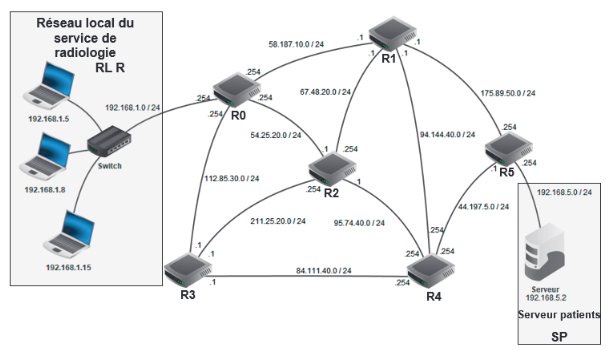    
    

Les adresses et les masques réseau sont indiqués à côté de chacune des connexions sous la forme X1.X2.X3.X4 /n , où `X1, X2, X3 et X4` représentent les 4 octets de l'adresse IP et `n` le nombre de bits à 1 dans le masque. On rappelle qu'un masque est constitué de 32 bits dont les `n` premiers bits sont à 1 et les autres à 0. Celui-ci définit avec l'adresse
réseau une plage d'adresses IP dont :  
* les `n` premiers bits, appelés "partie réseau", sont fixes ;  
* les bits restants, formant la "partie machine", peuvent prendre toutes les valeurs possibles.
    
Les adresses IP de toutes les machines connectées à un même réseau ont donc la même partie réseau. Enfin, deux adresses IP ne peuvent être attribuées à une machine :  
* celle dont tous les bits de la partie machine sont à 0 (adresse réseau) ;  
* celle dont tous les bits de la partie machine sont à 1 (adresse de diffusion).  
    
Le repérage au niveau des interfaces de connexion des différents routeurs permet de connaitre l'adresse utilisée par le routeur (passerelle) en fonction de l'adresse réseau.  
Exemples pour la liaison entre le routeur R0 et R1 :  
* Adresse de l'interface de R0 qui permet de communiquer avec `R1 : 58.187.10.254`  
* Adresse de l'interface de R1 qui permet de communiquer avec `R0 : 58.187.10.1`  
    
**A. Adressage**  
    
1. Quels sont l'adresse et le masque du réseau local du service de radiologie (`RL R`) ?  
    
2. Donner les adresses des trois interfaces du routeur R5 permettant de transmettre ou de recevoir des données.  
    
3.  
 a. Donner la première et la dernière adresse IP pouvant être attribuée à une machine sur le réseau `RL R`.  
 b. En déduire le nombre de machines pouvant être connectées sur ce réseau.  
    
L'administrateur réseau du centre hospitalier souhaite statuer sur les performances de deux protocoles de routage. Il étudie donc la transmission de l'information depuis le serveur patients (`SP`) vers le service de radiologie (`RL R`).  
L'étude portera donc sur les chemins entre les routeurs R5 et R0.  
  
    
**B. Etude du protocole RIP (Routing Information Protocol)**  
    
Dans cette partie, tous les routeurs utilisent le protocole RIP (distance en nombre de sauts).  
    
1. Le serveur `SP` doit transmettre des données au service de radiologie (via le routeur `R0`) en effectuant le moins de sauts possibles. Citer les routeurs parcourus par le paquet.  
    
2. Suite à une opération de maintenance, le serveur `R1` est déconnecté. Plus aucun paquet ne peut transiter par ce routeur.  
Déterminer une nouvelle route empruntée par les paquets en citant les routeurs dans l'ordre.  

<div class = "alert alert-block alert-warning">

**C. Protocole OSPF (Open Shortest Path First)**  
Le serveur R1 est reconnecté au réseau et est fonctionnel.  
Maintenant pour tenir compte du débit des liaisons, l'administrateur réseau décide d'étudier le protocole OSPF (distance liée au coût des liaisons) pour effectuer le routage.  
 
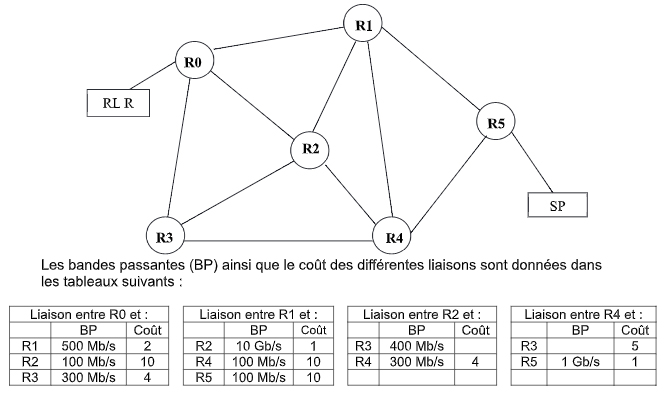
    
Pour calculer le coût d'une liaison, on utilise la formule :
    $ c = \frac{Bande\,passante\,de\,référence}{Bande\,passante\,de\,la\,liaison}$ = $ \frac{10^9}{BP}$  
    
où `BP` est la bande passante de la connexion en b/s (bit par seconde).  
    
**Si le résultat du calcul n'est pas un entier, le coût est la valeur entière immédiatement supérieure** .   
Exemple de calcul du coût entre R1 et R2 : $\frac {10^9}{10 x 10^9}= 0,1$ donc le coût est de 1  

1. Calculer le coût de la liaison entre R2 et R3.  
2. Donner une bande passante possible de la connexion entre R3 et R4.  
3. Déterminer le chemin parcouru par un paquet partant du serveur patients (`SP`) vers le service de radiologie (`RL R`) en utilisant le protocole OSPF. On précisera également le coût de ce chemin.  
    
4. Suite à une opération de maintenance, la liaison R0-R1 est déconnectée : plus aucun paquet ne peut transiter par cette liaison. Déterminer une nouvelle route empruntée par les paquets en citant les routeurs dans l'ordre.

<details>
<summary style="border:1pt solid #FE2E2E; border-radius:5pt; width:15%; color:black; padding:3px; background-color: white ; cursor: pointer;" > Correction </summary>  
    
<div>
<b>Partie A : Adressage</b><br/>    
<b>Question 1</b><br/>
L'adresse du service de radiologie est `192.168.1.0/24` c'est à dire que l'adresse du réseau est `192.168.1.0` et le masque `255.255.255.0`
<br/>
<b>Question 2</b><br/>
Les adresses des trois interfaces du routeur R5 sont :<br/>
    
```
172.89.50.0/24
44.197.5.0/24
192.168.5.0/24
```
<br/>
<b>Question 3</b><br/>
a. La première adresse pouvant être attribuée à une machine sur le réseau RL R est `192.168.1.1` et la dernière `192.168.1.254`.<br/>
b. Un maximum de 254 machines peuvent donc être connectées sur ce réseau.<br/>
<br/>
<b>Partie B : Etude du protocole RIP</b><br/>    
<b>Question 1</b><br/>
Les routeurs parcourus seront `R5 -> R1 -> R0`<br/> 
<b>Question 2</b><br/>
En cas de panne du routeur R1, une nouvelle route sera : `R5 ->  R4 ->  R2 ->  R0`    
    
<b>Partie C : Etude du protocole OSPF</b><br/>    
<b>Question 1</b><br/>    
Le coût de la liaison entre R2 et R3 est : $ \frac {10^9}{400\,x\,10^6} $ = 2,5<br/>
Le coût est l'entier immédiatement supérieur donc 3.   
<br/>
<b>Question 2</b><br/>
Une bande passante possible de la connexion entre R3 et R4 est 200 MB/s, en effet le coût sera alors $ \frac {10^9}{200\,x\,10^6}$ = 5<br/>
<br/>
<b>Question 3</b><br/> 
On a reproduit le graphe du réseau ci-dessous en faisant figurer les coûts des liaisons : 

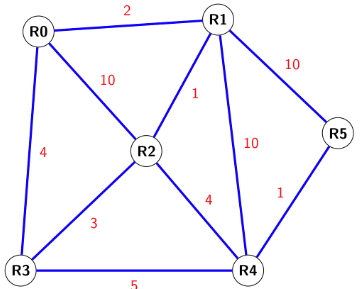
    
Le chemin parcouru sera donc `R0 -> R1 -> R2 -> R4 -> R5` et le coût total de ce chemin est 2 + 1 + 4 + 1 = 8<br/>
<br/>
<b>Question 4</b><br/>
En cas de panne du routeur R1, la nouvelle route sera : `R0 -> R3 -> R4 -> R5` et le coût total sera : 4 + 5 + 1 = 10
<br/>    
   
</div>
</details>

<div class = "alert alert-block alert-warning"><b>Exercice 2</b>

**Partie A**  
À son domicile, une élève remarque que l’adresse IP de l’interface réseau (carte wifi) de son ordinateur personnel est `192.168.1.14` avec le masque `255.255.255.0`.  
    
Pour chacune des questions ci-dessous, recopier **la seule bonne réponse** . 
    
1. Sous Unix, quelle instruction en ligne de commande a pu délivrer cette information ?  
◦ ifconfig  
◦ ping  
◦ ps  
◦ ls  
    
2. Parmi les protocoles ci-dessous, quel est celui qui a permis d’attribuer automatiquement cette adresse IP ?  
◦ DNS  
◦ DHCP  
◦ TCP  
◦ HTTP  
    
3. Parmi les adresses IP ci-dessous, quelle est la seule possible pour un autre appareil connecté au même réseau ?  
◦ 192.168.0.14  
◦ 192.168.0.1  
◦ 192.168.1.1  
◦ 192.168.1.255  
    
4. Toujours à son domicile, l’élève consulte une page web qui prétend que l’adresse IP de son ordinateur est `88.168.10.210`.  
◦ C’est une fausse information car son adresse IP est `192.168.1.14` .  
◦ C’est sûrement faux car seul le fournisseur d’accès peut avoir connaissance de cette information.  
◦ C’est possible et cette adresse serait celle de la box vers Internet.  
◦ C’est possible, mais cela signifierait que l’ordinateur est infecté par un malware.  
    
5. Est-il possible qu’un ordinateur connecté au réseau du lycée possède la même adresse IP que l'élève à son domicile ?  
◦ Oui, à condition que les connexions n’aient pas lieu au même moment.  
◦ Oui, car les adresses `192.168.x.x` ne sont pas routées sur Internet  .
◦ Oui, à condition d’utiliser un VPN.  
◦ Non, car deux machines sont identifiées de manière unique par leur adresse IP.  

**Partie B**  
On représente ci-dessous un réseau dans lequel R1, R2, R3, R4, R5, R6, R7 et R8 sont des routeurs. Le réseau local L1 est relié au routeur R1 et le réseau local L2 au routeur R8.  
    
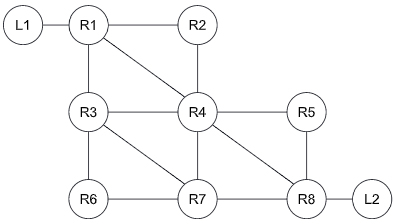
    
Les liaisons sont de trois types :  
* Eth : Ethernet, dont la bande passante est de 10 Mb/s ;  
* V1 : VDSL, dont la bande passante est de 50 Mb/s ;  
* V2 : VDSL2, dont la bande passante est de 100 Mb/s.  
    
On rappelle que la bande passante d’une liaison est la quantité d’information qui peut être transmise en bits/s.  
Le tableau ci-dessous précise les types des liaisons entre les routeurs.  
<table>
    <tr><td>Liaison</td><td>R1-R2</td><td>R1-R3</td><td>R1-R4</td><td>R2-R4</td><td>R3-R4</td><td>R3-R6</td><td>R3-R7</td><td>R4-R5</td><td>R4-R7</td><td>R4-R8</td><td>R5-R8</td><td>R6-R7</td><td>R7-R8</td></tr>
    <tr><td>Type</td><td>Eth</td><td>V2</td><td>Eth</td><td>V2</td><td>Eth</td><td>V2</td><td>Eth</td><td>V1</td><td>V2</td><td>Eth</td><td>V1</td><td>V2</td><td>Eth</td></tr>
</table>
    
Pour tenir compte du débit des liaisons, on décide d’utiliser le protocole OSPF (distance liée au coût minimal des liaisons) pour effectuer le routage.  
Le coût $C$ d’une liaison est donné par la formule : $C = \frac{10^9}{BP}$  où BP est la bande passante de la liaison en bits/s.  
    
1. Vérifier que le coût d’une liaison VDSL est égal à 20.  
2.  
 a. Recopier le graphe sur votre copie en inscrivant les coûts des liaisons.  
 b. Déterminer le chemin parcouru par un paquet partant du réseau L1 et arrivant au réseau L2, en utilisant le protocole OSPF.  
 c. La liaison R1-R4 est remplacée par une liaison de type ADSL avec une bande passante intermédiaire entre celles de type Ethernet et VDSL.  
Quel devrait être le coût maximal de cette liaison pour que des paquets issus du réseau L1 à destination du réseau L2 transitent par celle-ci ? En déduire la bande passante minimale de cette liaison

<details>
<summary style="border:1pt solid #FE2E2E; border-radius:5pt; width:15%; color:black; padding:3px; background-color: white ; cursor: pointer;" > Correction </summary>  
    
<div>
<b>Partie A : Adressage</b><br/>    
<b>Question 1</b><br/>
C'est la commande <b>ifconfig</b><br/>
Pour mémoire :<br/>
* ping permet de tester l'accès à une machine à travers un réseau ip<br/>
* ps liste les processus<br/>
* ls liste les fichiers et dossiers<br/>
<br/>
<b>Question 2</b><br/>
C'est le protocole <b>dhcp</b><br/>
Pour mémoire :<br/>
Un serveur dns permet d'associer des noms de domaines à des adresses<br/>
Le protocole tcp est le protocole de la couche transport du modèle tcp/ip chargé d'acheminer les informations (par paquets)<br/>
Le protocole http est le protocole de la couche application<br/>
<br/>
<b>Question 3</b><br/>
    
La seule adresse ip possible est `192.168.1.1`.<br/>
* Le masque de sous réseau est `255.255.255.0`, donc pour faire partie du même réseau, les trois premiers octets doivent être identiques. Les adresses `192.168.0.14` et `192.168.0.1` ne sont donc pas possibles (car elles ne commencent pas par `192.168.1`)<br/>
* L'adresse 192.168.1.255 est une adresse réservée (adresse de diffusion ou broadcast en anglais)<br/>
<br/>
    
<b>Question 4</b><br/>
C'est possible et cette adresse serait celle de la box vers Internet.<br/>
<br/>
<b>Question 5</b><br/>
Oui, car les adresses `192.168.x.x` ne sont pas routées sur internet<br/>    
    
    
<b>Partie B </b><br/>    
<b>Question 1</b><br/>
La bande passante d'une liaison VDSL est 50 Mb/s, son coût est donc : $ \frac {10^9}{50\,x\,10^6} $ ce qui fait bien 20.<br/>
<b>Question 2</b><br/>

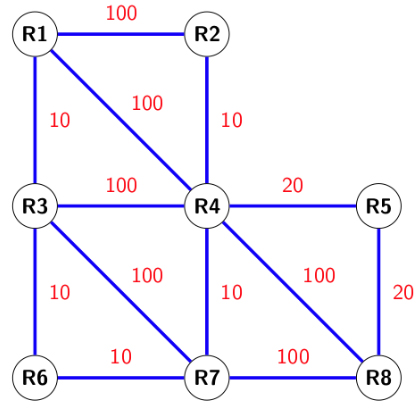    
    
<b>Question 3</b><br/>
La route utilisée sera : `R1 -> R3 -> R6 -> R7 -> R4 -> R5 -> R8` pour un coût total de 10 + 10 + 10 + 10 + 20 + 20 = 80<br/>
<b>Question 4</b><br/>
Le coût maximal de cette liaison devra être de 40, en effet le coût maximal de la route `R1 -> R4 -> R5 -> R8` sera alors de 80.<br/>
On doit résoudre $\frac{10^9}{BP} < 40 $ ce qui donne : $ BP > \frac{10^9}{40} $  c'est à dire <b>BP > 25</b> Mb/s.    
   
</div>
</details>